<a href="https://colab.research.google.com/github/anidaniel/BreastCancerDS/blob/master/brCancerNNMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''=============================================================================================================================================================================================================================================================================='''

In [0]:
#Description: This program detects breast cancer, based off of data and using Neural Networks
#Developer : Aniruddha Prasad (github.com/anidaniel)

In [0]:
# Import all needed libraries and sublibraries

import tensorflow as tf
%tensorflow_version 1.x

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

import numpy as np

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
#loading dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls '/content/drive/My Drive/Datasets'

brcancerdata.csv  X_data.csv  Y_data.csv


In [0]:
# Import input (x) and output (y) data, and asign these to df1 and df2

df1 = pd.read_csv('/content/drive/My Drive/Datasets/X_data.csv')

df2 = pd.read_csv('/content/drive/My Drive/Datasets/Y_data.csv')

In [0]:
# Scale input data
df1 = preprocessing.scale(df1)

In [0]:
# Split the data into input (x) training and testing data, and ouput (y) training and testing data, 
# with training data being 80% of the data, and testing data being the remaining 20% of the data

X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [9]:
# Define a "shallow" logistic regression model

model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history

history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])

history_dict=history.history









Epoch 00132: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

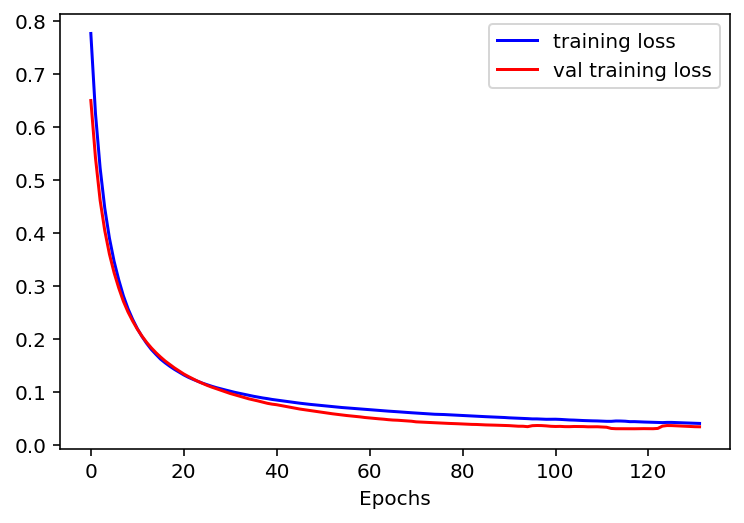

In [11]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

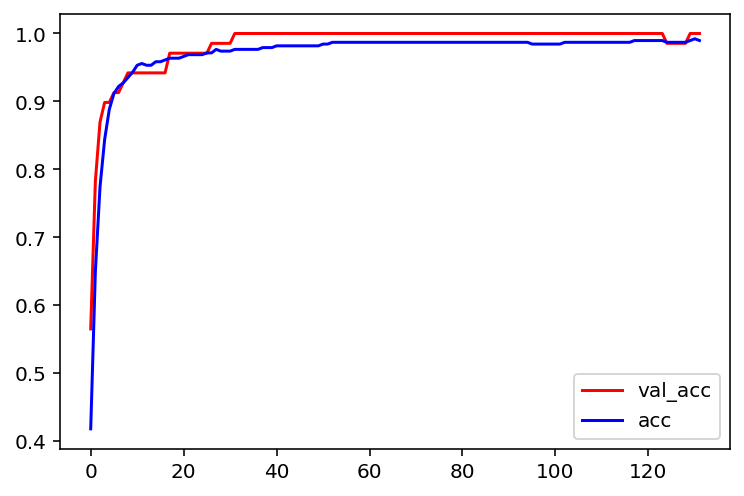

In [12]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-r',label='val_acc')
plt.plot(accuracy_values,'-b',label='acc')
plt.legend()

In [13]:
# Calculate loss and accuracy of testing data
loss, acc = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 79us/step
Test loss:  0.09533890820386116
Test accuracy:  0.9649122765189723


In [14]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9948051948051948


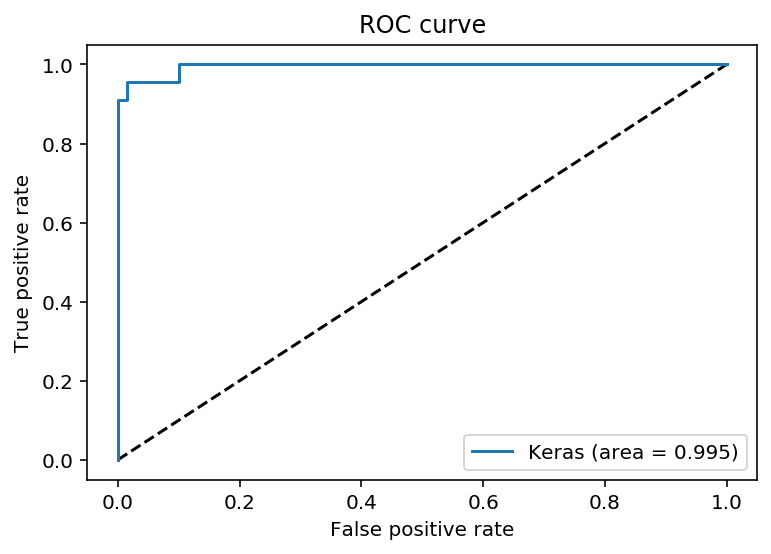

In [15]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [16]:
# AUC score of training data
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train,y_train_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Training data AUC: ', auc_keras)

Training data AUC:  0.9992488889816186


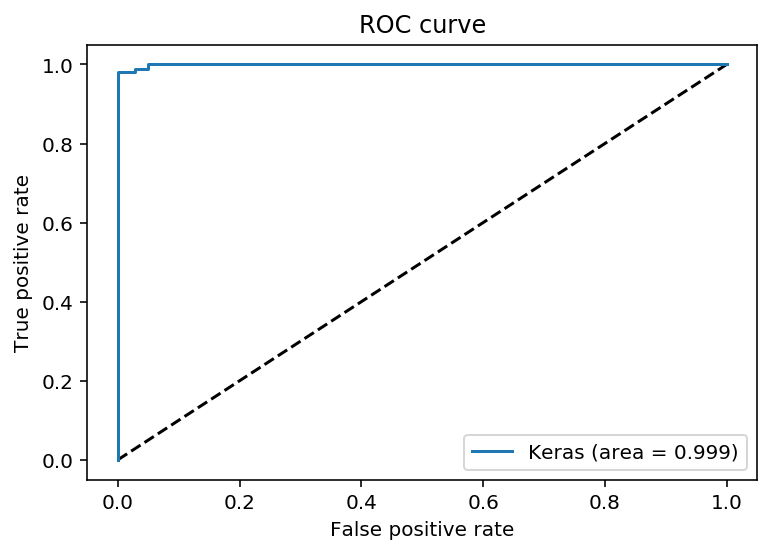

In [17]:
# ROC curve of training data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [0]:
'''=============================================================================================================================================================================================================================================================================='''

In [0]:
'''=============================================================================================================================================================================================================================================================================='''

In [0]:
# Make y_train categorical and assign this to y_train_cat
y_train_cat = to_categorical(y_train)

In [19]:
print(y_train)

     1
394  0
217  1
117  1
468  0
478  1
..  ..
213  1
199  0
319  0
510  0
530  0

[454 rows x 1 columns]


In [20]:
print(y_train_cat)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 

In [0]:
#Define a "shallow" softmax regression model

model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics = ['accuracy'])

In [22]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history
history = model.fit(X_train, y_train_cat, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])

history_dict=history.history

Epoch 01678: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

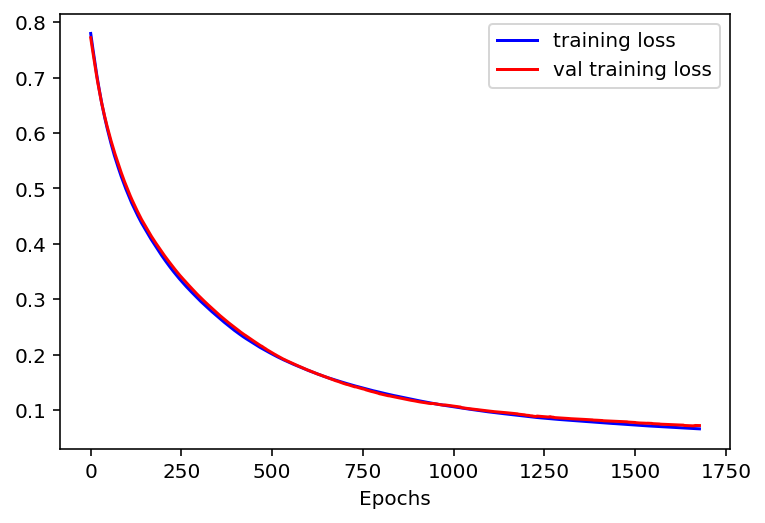

In [23]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

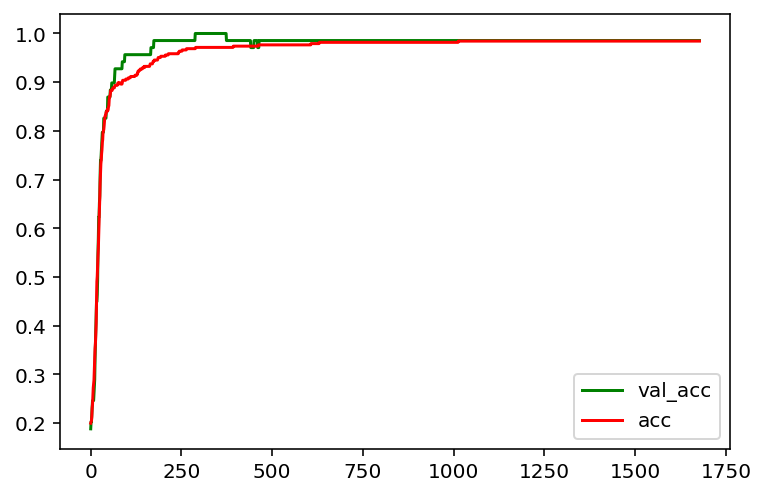

In [24]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-g',label='val_acc')
plt.plot(accuracy_values,'-r',label='acc')
plt.legend()

In [25]:
# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 52us/step
Test loss:  0.09370659422456172
Test accuracy:  0.9736842105263158


In [26]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9974025974025974


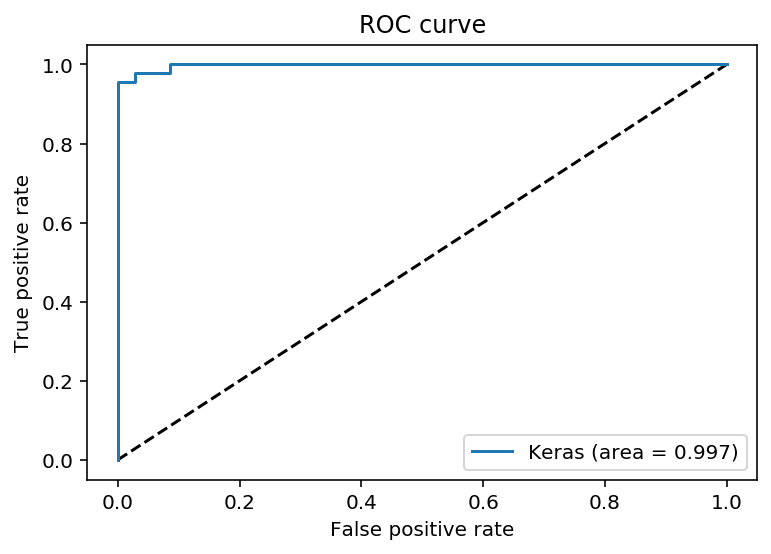

In [27]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [28]:
# AUC score of training data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9953264203300716


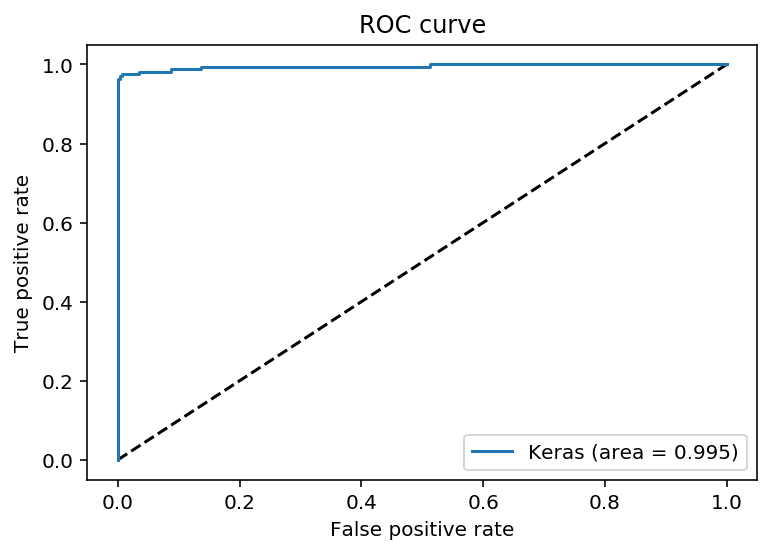

In [29]:
# ROC curve of training data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [0]:
# Define a "deep" softmax regression model
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [32]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

# Fit model over 2000 iterations with 'earlystopper' callback, and assign it to history
history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
history_dict = history.history

Epoch 00366: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

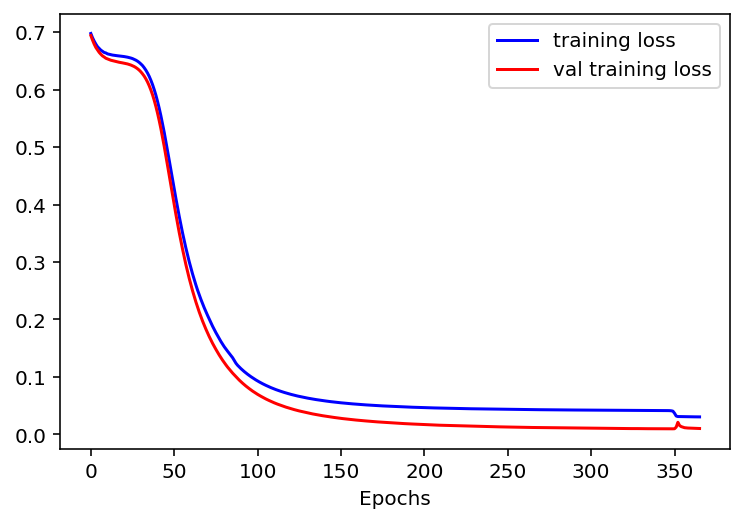

In [33]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

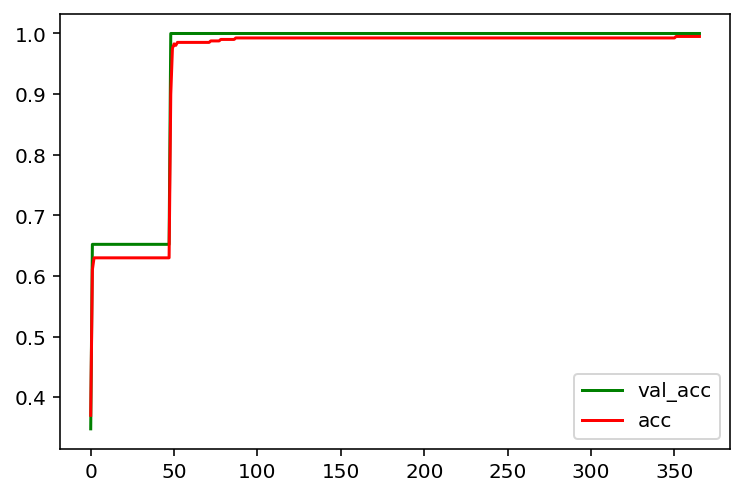

In [34]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-g',label='val_acc')
plt.plot(accuracy_values,'-r',label='acc')
plt.legend()

In [35]:
# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 70us/step
Test loss:  0.093486579821298
Test accuracy:  0.9736842063435337


In [36]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9977272727272728


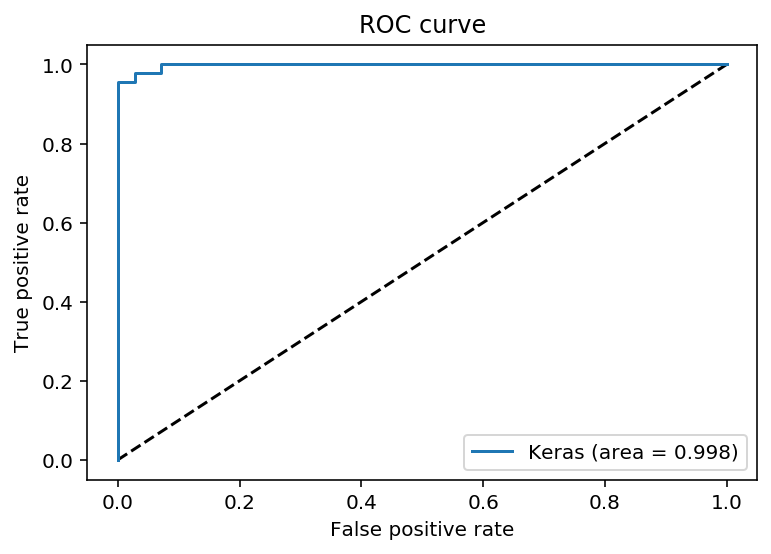

In [37]:
# ROC curve of testing data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [40]:
# AUC score of training data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Training data AUC: ', auc_keras)

Training data AUC:  0.9948465438461057


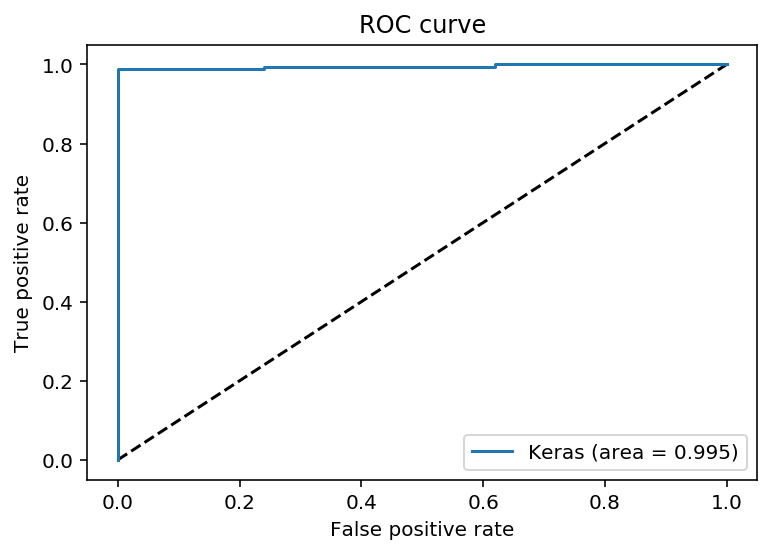

In [39]:
# ROC curve of training data

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [0]:
# Define a "deep" softmax regression model
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [0]:
# store the initial random weights
initial_weights = model.get_weights()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [45]:
train_sizes = (len(X_train) * np.linspace(0.1, 0.999, 4)).astype(int)
train_sizes

array([ 45, 181, 317, 453])

In [46]:
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = \
    train_test_split(X_train, y_train, train_size=train_size)
    # Make y_train_frac categorical and assign this to y_train_frac FIX THIS
    y_train_frac = to_categorical(y_train_frac)
    
    # Reset the weights of the model
    model.set_weights(initial_weights)
    
    h = model.fit(X_train_frac, y_train_frac,
                  verbose=0,
                  epochs=1000,
                  callbacks=[EarlyStopping(monitor='loss', patience=20)])

    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    train_scores.append(r[-1])
    
    y_test_cat = to_categorical(y_test)
    
    e = model.evaluate(X_test, y_test_cat, verbose=0)
    test_scores.append(e[-1])
    
    print("Done size: ", train_size)

Done size:  45
Done size:  181
Done size:  317
Done size:  453


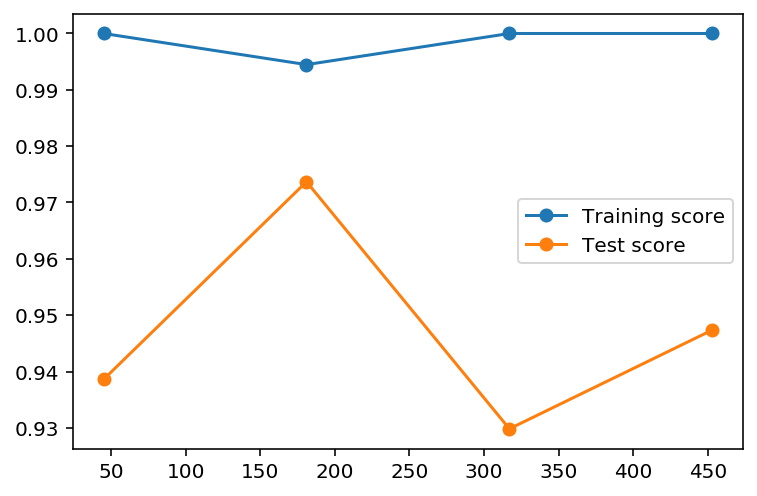

In [47]:
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Test score")
plt.legend(loc="best")

In [0]:
'''=============================================================================================================================================================================================================================================================================='''

In [0]:
'''=============================================================================================================================================================================================================================================================================='''

In [48]:
# Dropout (no significant impact)
# Define a "deep" softmax regression model
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(13, activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(13, activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(13, activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [49]:
# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
history_dict = history.history

Epoch 00052: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

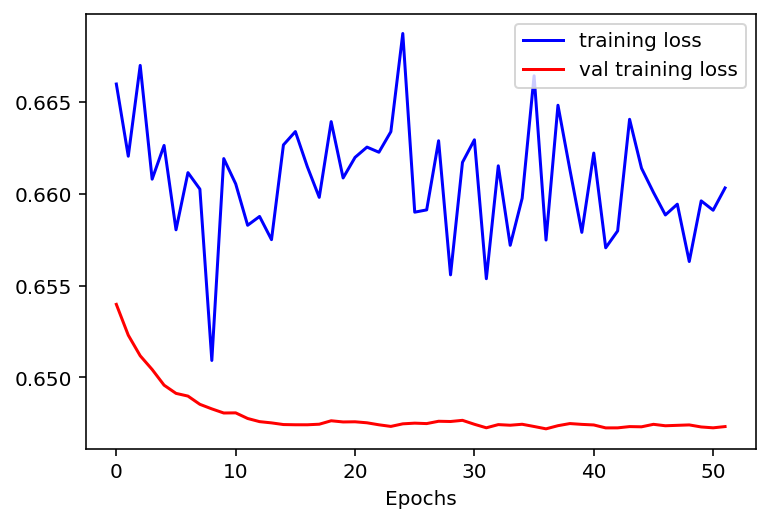

In [50]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

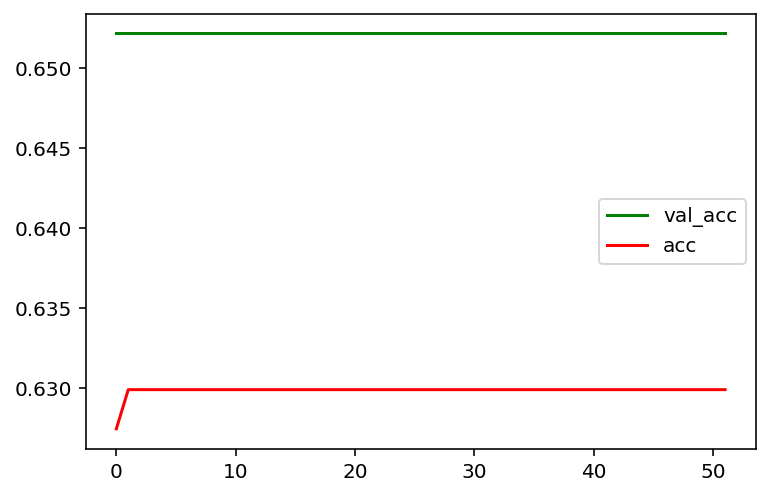

In [51]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-g',label='val_acc')
plt.plot(accuracy_values,'-r',label='acc')
plt.legend()

In [52]:
# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 68us/step
Test loss:  0.6719909644963449
Test accuracy:  0.6052631558033458


In [0]:
'''=============================================================================================================================================================================================================================================================================='''

In [0]:
'''=============================================================================================================================================================================================================================================================================='''

In [0]:
# Batch normalization (no significant impact)
# Define a "deep" softmax regression model
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='softmax'))
model.add(BatchNormalization())
model.add(Dense(13, activation='softmax'))
model.add(BatchNormalization())
model.add(Dense(13, activation='softmax'))
model.add(BatchNormalization())
model.add(Dense(13, activation='softmax'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [54]:
# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
history_dict = history.history

Epoch 00032: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

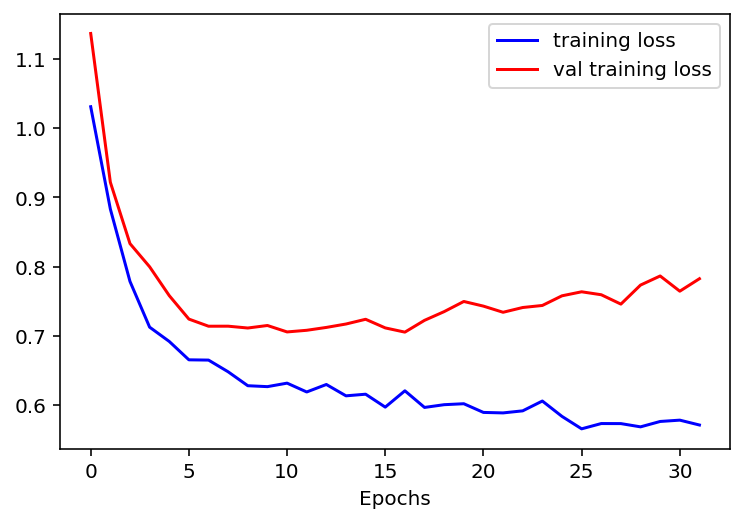

In [55]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

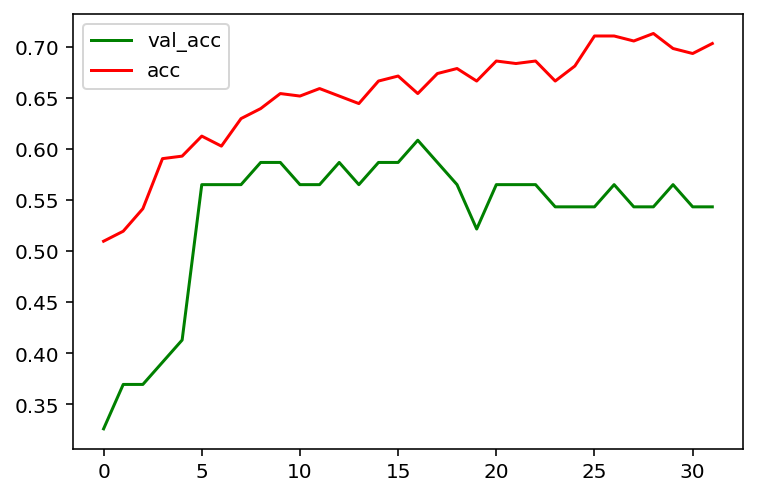

In [56]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-g',label='val_acc')
plt.plot(accuracy_values,'-r',label='acc')
plt.legend()

In [57]:
# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 88us/step
Test loss:  0.7942394446908382
Test accuracy:  0.5438596522598936


In [0]:
'''=============================================================================================================================================================================================================================================================================='''

In [0]:
'''=============================================================================================================================================================================================================================================================================='''

In [0]:
# Weight regularization (actually has an adverse effect on perfomance)
# Define a "deep" softmax regression model
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(13, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(13, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(13, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [59]:
# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1,shuffle = True, verbose = 0, 
                    callbacks = [earlystopper])
history_dict = history.history

Epoch 00114: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

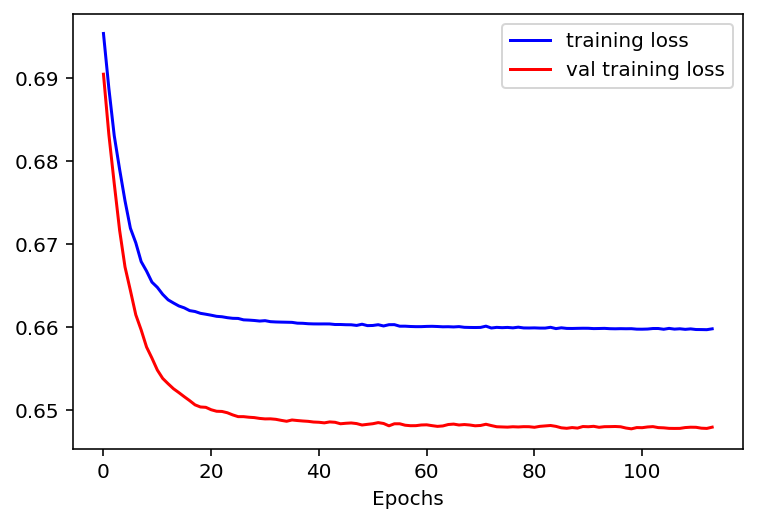

In [60]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

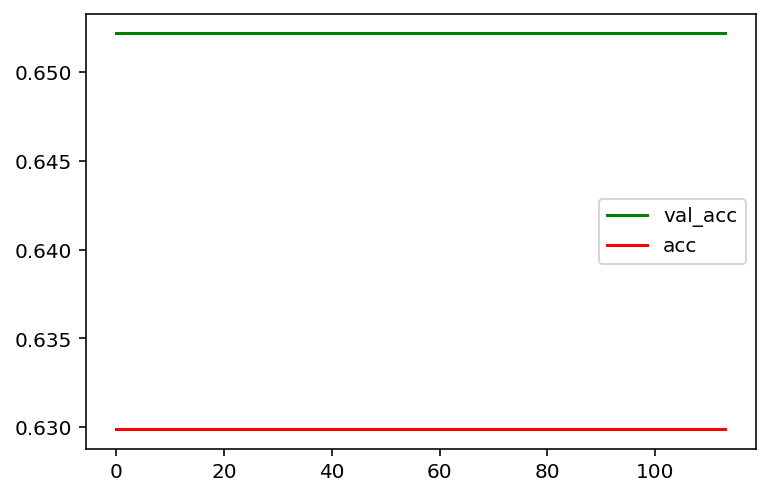

In [61]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-g',label='val_acc')
plt.plot(accuracy_values,'-r',label='acc')
plt.legend()

In [62]:
# Calculate loss and accuracy of testing data
y_test_cat = to_categorical(y_test)
loss, acc = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

114/114 [==============================] - 0s 98us/step
Test loss:  0.672597913365615
Test accuracy:  0.6052631558033458
